In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


genres = pd.read_csv("tmdb_genres.csv", names=['genre_id','genre_name'], header=0)
movies = pd.read_csv("tmdb_movies.csv")

In [102]:
movies = movies.merge(genres, left_on="genre_id", right_on="genre_id", how="left")

In [103]:
print(movies[['title', 'genre_id', 'genre_name']].head())

                                      title  genre_id genre_name
0                                    Avatar      28.0     Action
1  Pirates of the Caribbean: At World's End      12.0  Adventure
2                                   Spectre      28.0     Action
3                     The Dark Knight Rises      28.0     Action
4                               John Carter      28.0     Action


In [104]:
vote_count_75 = movies['vote_count'].quantile(0.75)

In [105]:
top_movies = movies[movies['vote_count'] > vote_count_75].sort_values(by='vote_average', ascending=False).head(10)
print(top_movies[['title', 'vote_average', 'vote_count']])

                         title  vote_average  vote_count
1881  The Shawshank Redemption           8.5        8205
3337             The Godfather           8.4        5893
2294             Spirited Away           8.3        3840
3865                  Whiplash           8.3        4254
2731    The Godfather: Part II           8.3        3338
3232              Pulp Fiction           8.3        8428
1818          Schindler's List           8.3        4329
662                 Fight Club           8.3        9413
2170                    Psycho           8.2        2320
1847                GoodFellas           8.2        3128


In [106]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies_filtered = movies[(movies['release_date'].dt.year >= 2010) & (movies['release_date'].dt.year <= 2016)]

In [107]:
movies_grouped = movies_filtered.groupby(movies_filtered['release_date'].dt.year).agg(
    total_revenue=('revenue', 'sum'),
    total_budget=('budget', 'sum'),
    count_movies=('title', 'count')
).reset_index()

movies_grouped['avg_revenue'] = movies_grouped['total_revenue'] / movies_grouped['count_movies']
movies_grouped['avg_budget'] = movies_grouped['total_budget'] / movies_grouped['count_movies']

movies_grouped['avg_revenue'] = movies_grouped['avg_revenue'] / 1e6
movies_grouped['avg_budget'] = movies_grouped['avg_budget'] / 1e6

print(movies_grouped[['release_date','avg_revenue','avg_budget']])

   release_date  avg_revenue  avg_budget
0          2010    90.438110   34.495411
1          2011    92.004131   34.772320
2          2012   116.065915   34.922032
3          2013   101.348456   35.523294
4          2014   101.346599   30.959888
5          2015   105.439927   31.132164
6          2016   139.049586   45.703269


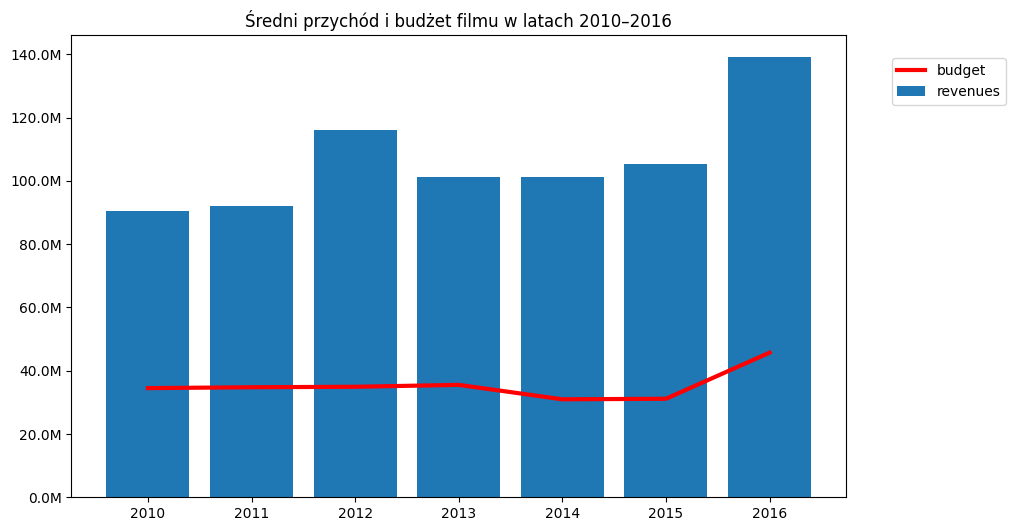

In [108]:
def million(x, pos):
    return f'{x:.1f}M'

years = movies_grouped['release_date']
avg_revenue = movies_grouped['avg_revenue']
avg_budget = movies_grouped['avg_budget']

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(years, avg_revenue, label='revenues')

ax.plot(years, avg_budget, color='red', label='budget', linewidth=3)

ax.set_xticks(range(2010, 2017))
ax.set_xticklabels(range(2010, 2017))

ax.yaxis.set_major_formatter(FuncFormatter(million))

plt.title('Średni przychód i budżet filmu w latach 2010–2016')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.9))

plt.show()

In [109]:
genre_counts = movies['genre_name'].value_counts()
print(genre_counts)
most_common_genre = genre_counts.idxmax()
num_movies = genre_counts.max()
print(f"Najczesciej wystepujący gatunek: {most_common_genre}, liczba filmow: {num_movies}")

genre_name
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: count, dtype: int64
Najczesciej wystepujący gatunek: Drama, liczba filmow: 1207


In [110]:
avg_runtime_by_genre = movies.groupby('genre_name')['runtime'].mean()
print(avg_runtime_by_genre)
longest_runtime_genre = avg_runtime_by_genre.idxmax()
avg_runtime = avg_runtime_by_genre.max()
print(f"Gatunek filmow o najdluzszym srednim czasie trwania: {longest_runtime_genre}, średni czas: {avg_runtime:.2f} min")

genre_name
Action             109.058355
Adventure          113.061947
Animation           89.552846
Comedy             100.464491
Crime              112.143590
Documentary         93.511364
Drama              115.521559
Family              89.803571
Fantasy            106.487179
Foreign             83.000000
History            133.960000
Horror              94.753333
Music              102.852941
Mystery            100.609756
Romance            107.094340
Science Fiction    109.031250
TV Movie           110.500000
Thriller           105.690722
War                126.125000
Western            117.925926
Name: runtime, dtype: float64
Gatunek filmow o najdluzszym srednim czasie trwania: History, średni czas: 133.96 min


<Axes: >

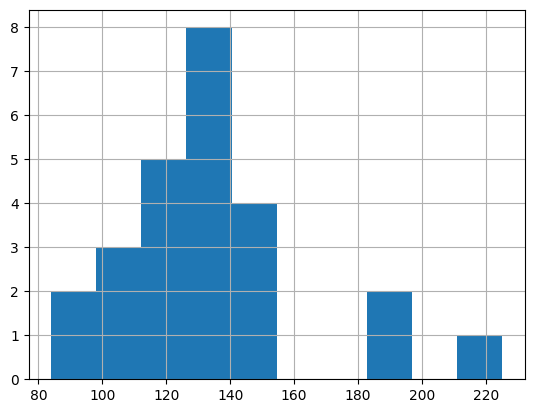

In [111]:
longest_genre_movies = movies[movies['genre_name'] == longest_runtime_genre]
longest_genre_movies['runtime'].hist(bins=10)